# FACE DETECTION

Face detection sử dụng phương pháp đặc trưng haar cascade có trong thư viện OpenCV

### **_1. Import các packages cần thiết_**

In [29]:
import numpy as np 
import urllib
import matplotlib.pyplot as plt
import cv2
import sys
from urllib.request import urlopen
import os.path

### ***2. Xây dựng hàm đọc file từ url***

In [30]:
def url2image(url):
    resp = urlopen(url) #lấy tài nguyên qua url lưu vào biến resp
    image = np.asarray(bytearray(resp.read()),dtype = 'uint8') #Chuyển tài nguyên ở biến resp thành mảng 1 chiều có giá trị là các số nguyên từ 0-255
    image = cv2.imdecode(image,cv2.IMREAD_COLOR) #Đọc hình từ biến image có định dạng ảnh màu BGR
    return image

### ***3. Download và load file haarcascade_frontalface***

In [31]:
face_classifier_xml = 'my_haarcascade_frontalface_default.xml'
ret = os.path.exists(face_classifier_xml) #kiểm tra tồn tại file xml hay chưa?

if ret:#nếu có file xml thì báo already
    print('The cascade classifier xml file already existed\n') 
else:#nếu chưa thì download từ .....
    print('Downloadling the cascade classifier xml file from internet ...\n')
    face_classifier_url = 'https://raw.githubusercontent.com/shantnu/Webcam-Face-Detect/master/haarcascade_frontalface_default.xml'
    resp = urlopen(face_classifier_url)
    data = resp.read()
    
    fh = open(face_classifier_xml,"wb")
    fh.write(data)
    fh.close()
    resp.close()

face_cascade = cv2.CascadeClassifier(face_classifier_xml) #load file xml

The cascade classifier xml file already existed



### ***4.Input*** 

In [32]:
bgr_img = url2image('https://raw.githubusercontent.com/buiduongthuytien/GifHub/master/IMG_5331.png')
cv2.imwrite('IMG_5331.png',bgr_img)
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY) #chuyển ảnh màu bgr thành ảnh xám

### ***5. Processing***

*Sử dụng hàm detectMultiScale để nhận diện khuôn mặt*

In [33]:
faces = face_cascade.detectMultiScale(gray_img,1.25,3) #Phát hiện các đối tượng có kích thước khác nhau trong hình ảnh đầu vào. Các đối tượng được phát hiện được trả về dưới dạng danh sách các hình chữ nhật.
for (x,y,w,h) in faces:
    cv2.rectangle(bgr_img,(x,y),(x+w,y+h), (255,0,0),4)

### ***6.Output***

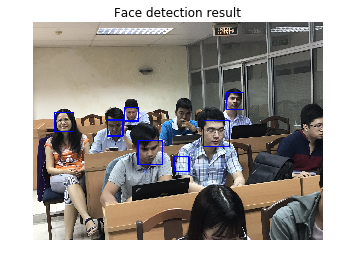

True

In [34]:
plt.axis('off')
plt.title('Face detection result')
plt.imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite('IMG_FDR.png',bgr_img)

![](IMG_FDR.png)

### ***7. Xây dựng class Cropper để cắt ảnh thêm vào từng thư mục riêng***

In [35]:
class FaceCropper(object):
    CASCADE_PATH = "my_haarcascade_frontalface_default.xml"

    def __init__(self):#Khi một thực thể (instance) của một class được tạo ra thì hàm này sẽ được thực thi đầu tiên và một cách tự động
        self.face_cascade = cv2.CascadeClassifier(self.CASCADE_PATH)

    def generate(self, image_path, show_result):#Hàm cắt gương mặt
        img = cv2.imread(image_path)
        if (img is None):
            print("Can't open image file")
            return 0

        
        faces = self.face_cascade.detectMultiScale(img, 1.25, 3)
        if (faces is None):
            print('Failed to detect face')
            return 0

        if (show_result):
            for (x, y, w, h) in faces:
                cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
            cv2.imshow('img', img)
            cv2.destroyAllWindows()

        facecnt = len(faces)
        print("Detected faces: %d" % facecnt)
        i = 0
        height, width = img.shape[:2]

        for (x, y, w, h) in faces:
            r = max(w, h) / 2
            centerx = x + w / 2
            centery = y + h / 2
            nx = int(centerx - r)
            ny = int(centery - r)
            nr = int(r * 2)

            faceimg = img[ny:ny+nr, nx:nx+nr]
            lastimg = cv2.resize(faceimg, (150, 150))
            i += 1
            directory = "face"+str(i)
            if not os.path.exists(directory): #Nếu không tồn tại đường dẫn
                os.makedirs(directory)#Tạo đường dẫn
                cv2.imwrite("./face"+str(i)+"/"+"face"+str(i)+".jpg",lastimg)#Write hình xuống đường dẫn (/face1/face1.jpg)

### ***8. Thực hiện chạy demo***

In [36]:
detecter = FaceCropper()
detecter.generate('IMG_5331.png', True)

Detected faces: 7


![](Capture.PNG)

### ***9. Tham khảo***

In [ ]:
[1] https://gist.github.com/tilfin/98bbba47fdc4ac10c4069cce5fabd834